In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pickle
import random

from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image


In [2]:
with open("./traffic_sign_data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
    
with open("./traffic_sign_data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
    
with open("./traffic_sign_data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
print(train.keys())

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape, X_validation.shape, X_test.shape

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3))

In [6]:
y_train.shape, y_validation.shape, y_test.shape

((34799,), (4410,), (12630,))

In [7]:
print(str(len(np.unique(y_train))) + ' classes in total')

43 classes in total


# Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

In [8]:
Signs = {
  '0' : 'Speed limit (20km/h)',
  '1' : 'Speed limit (30km/h)',
  '2' : 'Speed limit (50km/h)' ,
  '3' : 'Speed limit (60km/h)',
  '4' : 'Speed limit (70km/h)' ,
  '5' : 'Speed limit (80km/h)',
  '6' : 'End of speed limit (80km/h)',
  '7' : 'Speed limit (100km/h)',
  '8' : 'Speed limit (120km/h)',
  '9' : 'No passing',
  '10' : 'No passing for vehicles over 3.5 metric tons',
  '11' : 'Right-of-way at the next intersection',
  '12' : 'Priority road',
  '13' : 'Yield',
  '14' : 'Stop',
  '15' : 'No vehicles',
  '16' : 'Vehicles over 3.5 metric tons prohibited',
  '17' : 'No entry',
  '18' : 'General caution',
  '19' : 'Dangerous curve to the left',
  '20' : 'Dangerous curve to the right',
  '21' : 'Double curve',
  '22' : 'Bumpy road',
  '23' : 'Slippery road',
  '24' : 'Road narrows on the right',
  '25' : 'Road work',
  '26' : 'Traffic signals',
  '27' : 'Pedestrians',
  '28' : 'Children crossing' ,
  '29' : 'Bicycles crossing',
  '30' : 'Beware of ice/snow',
  '31' : 'Wild animals crossing',
  '32' : 'End of all speed and passing limits',
  '33' : 'Turn right ahead',
  '34' : 'Turn left ahead',
  '35' : 'Ahead only',
  '36' : 'Go straight or right',
  '37' : 'Go straight or left',
  '38' : 'Keep right',
  '39' : 'Keep left',
  '40' : 'Roundabout mandatory',
  '41' : 'End of no passing',
  '42' : 'End of no passing by vehicles over 3.5 metric tons'
}

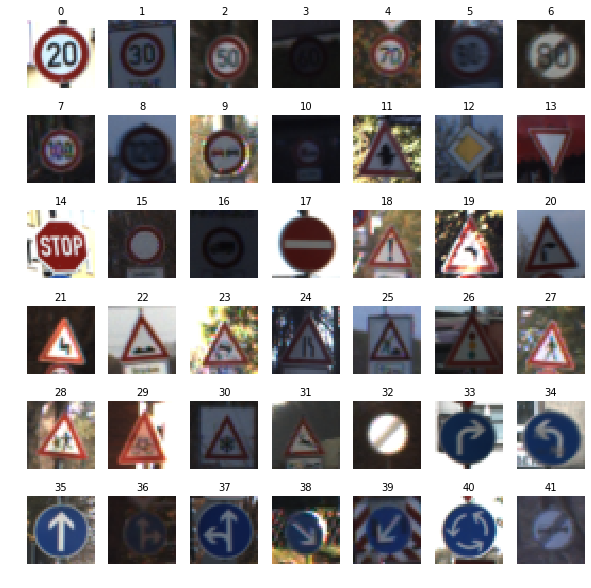

In [9]:
W_grid = 7
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()

n_training = len(X_train)

for i in range(len(np.unique(y_train))-1):
    axes[i].imshow(X_train[y_train == i][np.random.randint(0, len(X_train[y_train == i]))])
    axes[i].set_title(i, fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)



42

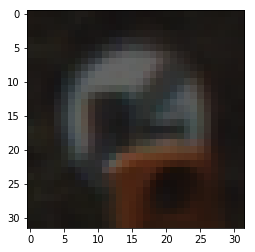

In [10]:
plt.imshow(X_train[y_train == 42][np.random.randint(0, len(X_train[y_train == 42]))])
y_train[y_train == 42][np.random.randint(0, len(X_train[y_train == 42]))]

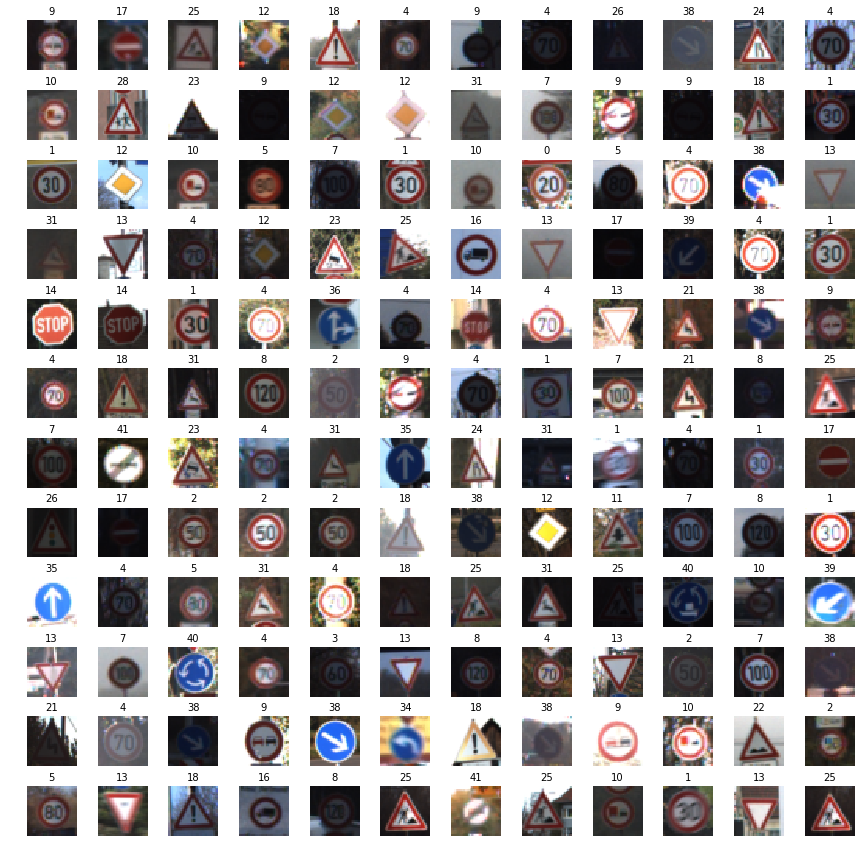

In [11]:
W_grid = 12
L_grid = 12

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)


In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
X_train, y_train = shuffle(X_train, y_train)
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_train_gray_norm = (X_train_gray - 128) / 128

X_validation, y_validation = shuffle(X_validation, y_validation)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_validation_gray_norm = (X_validation_gray - 128) / 128

X_test, y_test = shuffle(X_test, y_test)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_test_gray_norm = (X_test_gray - 128) / 128

In [14]:
X_train_gray_norm.shape, X_validation_gray_norm.shape, X_test_gray_norm.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

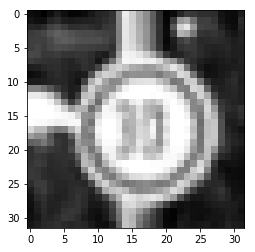

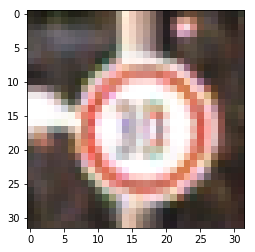

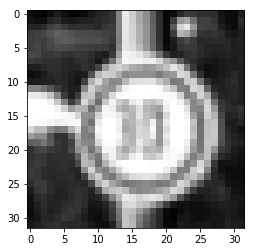

In [15]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [16]:

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), padding='same', activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.MaxPooling2D(2,2))
        
CNN.add(layers.Conv2D(16, (5,5), padding='same', activation = 'relu'))
CNN.add(layers.MaxPooling2D(2,2))
        
CNN.add(layers.Conv2D(32, (5,5), padding='same', activation = 'relu'))
CNN.add(layers.MaxPooling2D(2,2))    
    
CNN.add(layers.Flatten())
        
CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Dense(43, activation = 'softmax'))
        


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
__________

In [18]:
CNN.compile(
    optimizer = 'Adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [19]:
history = CNN.fit(
    X_train_gray_norm,
    y_train,
    batch_size = 500,
    epochs = 40,
    verbose = 1,
    validation_data = (X_validation_gray_norm, y_validation)
)

Train on 34799 samples, validate on 4410 samples
Epoch 1/40
34799/34799 [==============================] - 16s 452us/sample - loss: 3.4768 - acc: 0.0756 - val_loss: 3.2221 - val_acc: 0.1429
Epoch 2/40
34799/34799 [==============================] - 3s 98us/sample - loss: 2.6857 - acc: 0.2509 - val_loss: 2.0428 - val_acc: 0.4315
Epoch 3/40
34799/34799 [==============================] - 3s 98us/sample - loss: 1.8682 - acc: 0.4404 - val_loss: 1.4626 - val_acc: 0.5583
Epoch 4/40
34799/34799 [==============================] - 3s 99us/sample - loss: 1.4507 - acc: 0.5473 - val_loss: 1.1696 - val_acc: 0.6331
Epoch 5/40
34799/34799 [==============================] - 3s 99us/sample - loss: 1.1973 - acc: 0.6131 - val_loss: 1.0252 - val_acc: 0.6819
Epoch 6/40
34799/34799 [==============================] - 3s 99us/sample - loss: 1.0277 - acc: 0.6712 - val_loss: 0.8715 - val_acc: 0.7338
Epoch 7/40
34799/34799 [==============================] - 3s 101us/sample - loss: 0.8823 - acc: 0.7155 - val_loss: 

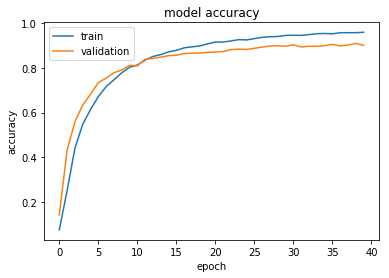

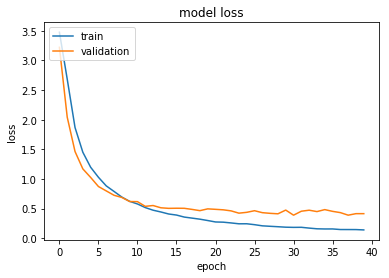

In [20]:
# Plotting the accuracy of "model"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 122us/sample - loss: 0.5450 - acc: 0.8973
Test Accuracy: 0.8973079919815063


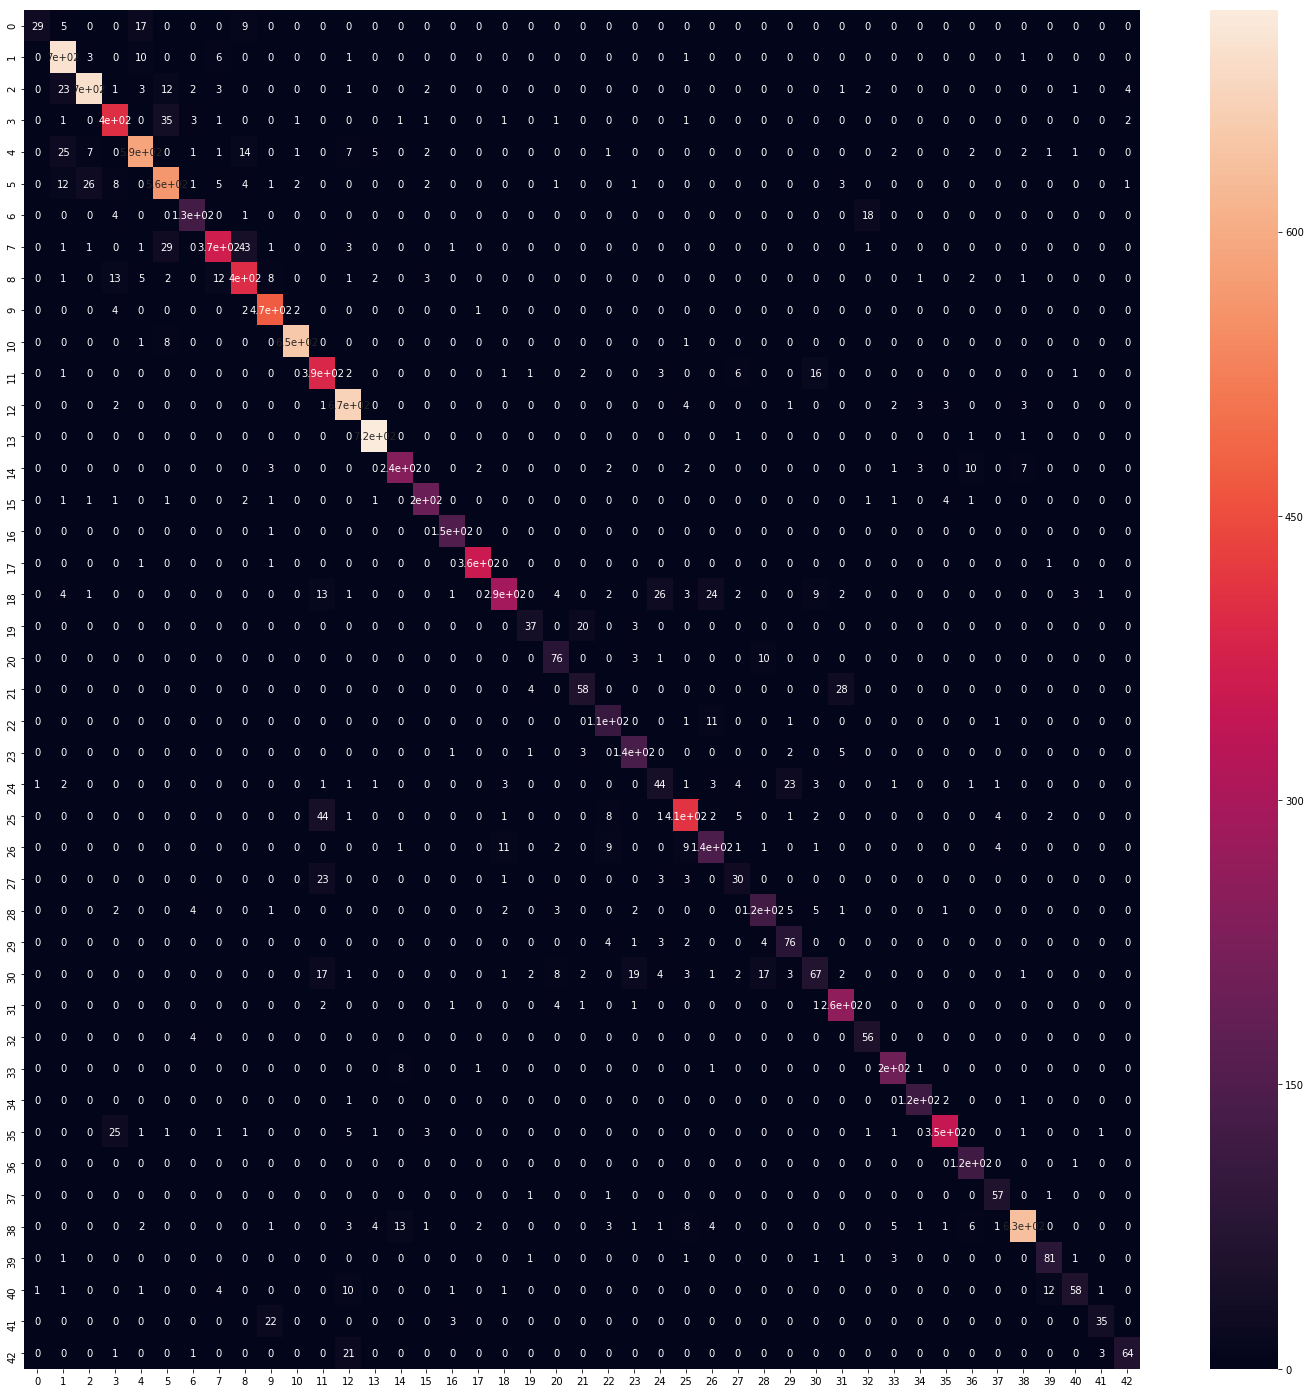

In [22]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

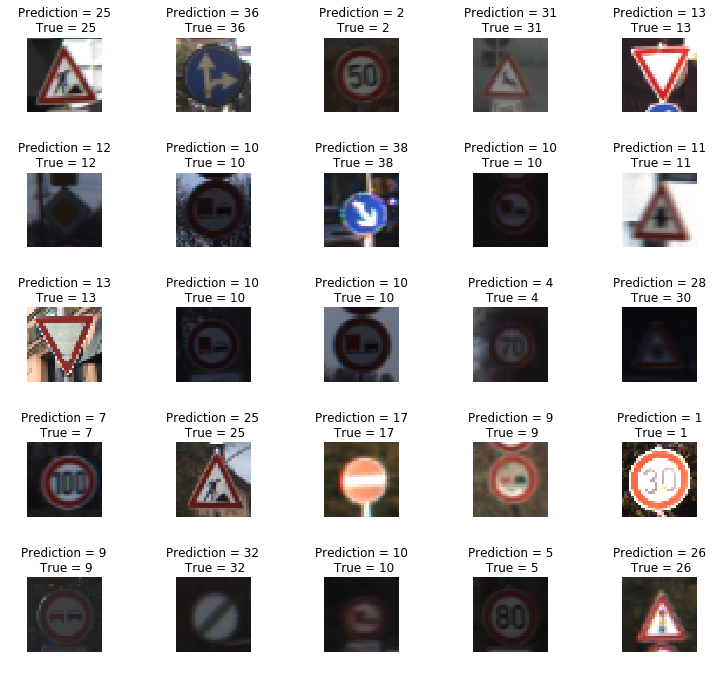

In [23]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [24]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; SM Files (*.sm)")
    return fname[0]

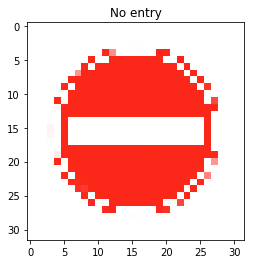

In [25]:

img = image.load_img(gui_fname(), target_size=(32, 32))
z = image.img_to_array(img)

z = np.expand_dims(z, axis=0)
z = np.sum(z/3, axis=3, keepdims=True)
z = (z - 128) / 128

classes = CNN.predict(z, batch_size=10)

#print(np.max(classes))

plt.title(Signs[str(classes.argmax())])
plt.imshow(img)

In [ ]:

img = image.load_img(gui_fname(), target_size=(32, 32))
z = image.img_to_array(img)

z = np.expand_dims(z, axis=0)
z = np.sum(z/3, axis=3, keepdims=True)
z = (z - 128) / 128

classes = CNN.predict(z, batch_size=10)

#print(np.max(classes))

plt.title(Signs[str(classes.argmax())])
plt.imshow(img)